In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
companies = pd.read_csv("C://Users/Radhika/Desktop/companies.txt",sep='\t',encoding="ISO-8859-1")

In [6]:
rounds2 = pd.read_csv("C://Users/Radhika/Desktop/rounds2.csv",encoding="ISO-8859-1")

In [7]:
sect_map = pd.read_csv("C://Users/Radhika/Desktop/mapping.csv")

In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [9]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [10]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [11]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
#Data cleaning for both the dataframes
companies['permalink'] = companies.permalink.apply(lambda x: x.lower())
rounds2['company_permalink'] = rounds2.company_permalink.apply(lambda x: x.lower())

In [13]:
companies.shape, rounds2.shape

((66368, 10), (114949, 6))

In [14]:
companies.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [15]:
# Merging the 2 dataframes companies and rounds2
merge1 = pd.merge(companies,rounds2,how="inner",left_on="permalink",right_on="company_permalink")
merge1.shape

(114942, 16)

In [16]:
merge1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


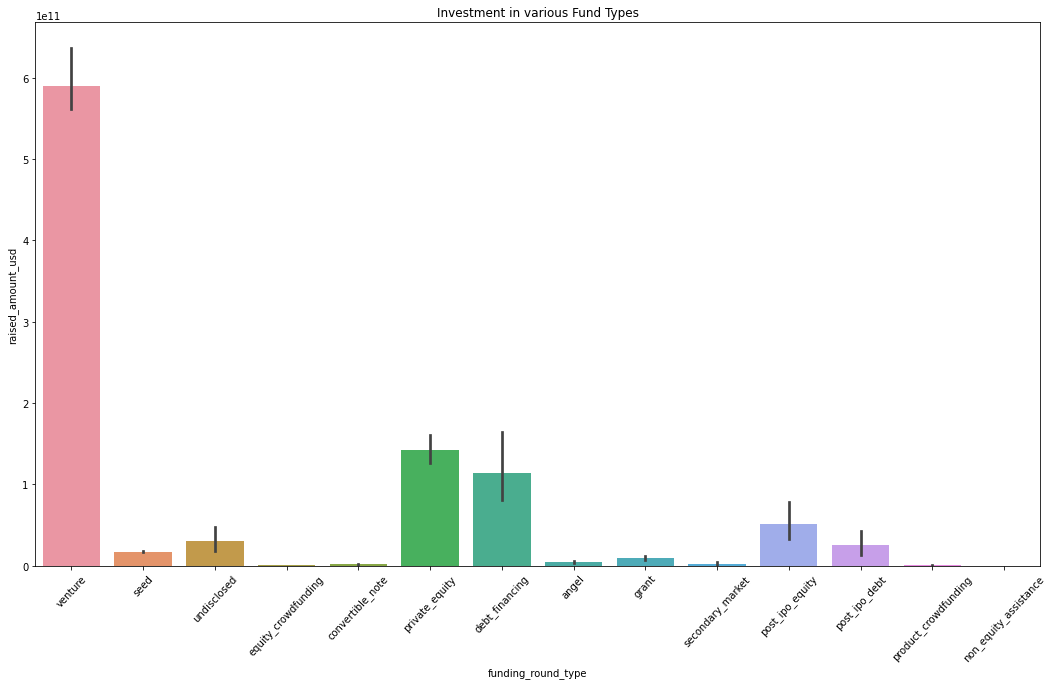

In [19]:
# Funding Analysis
import numpy as np
plt.figure(figsize=(18,10))
plt.title('Investment in various Fund Types')
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=merge1,estimator=np.sum)
plt.xticks(rotation=47)
plt.show()

In [20]:
#Dropping all excep venture, seed, angel and private_equity funding type
merge1 = merge1[merge1.funding_round_type.isin(['venture','angel','seed','private_equity'])]

In [21]:
merge1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [22]:
#Finding average of each funding round type
venture_mean = merge1[merge1['funding_round_type']=='venture'].raised_amount_usd.mean()
print(f"Average funding amount raised for Venture type: {round(venture_mean,2)}")

Average funding amount raised for Venture type: 11748949.13


In [23]:
seed_mean = merge1[merge1['funding_round_type']=='seed'].raised_amount_usd.mean()
print(f"Average funding amount raised for Seed type: {round(seed_mean,2)}")

Average funding amount raised for Seed type: 719779.62


In [24]:
angel_mean = merge1[merge1['funding_round_type']=='angel'].raised_amount_usd.mean()
print(f"Average funding amount raised for Angel type: {round(angel_mean,2)}")

Average funding amount raised for Angel type: 958694.47


In [25]:
private_equity_mean = merge1[merge1['funding_round_type']=='private_equity'].raised_amount_usd.mean()
print(f"Average funding amount raised for Private Equity type: {round(private_equity_mean,2)}")

Average funding amount raised for Private Equity type: 73308593.03


<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

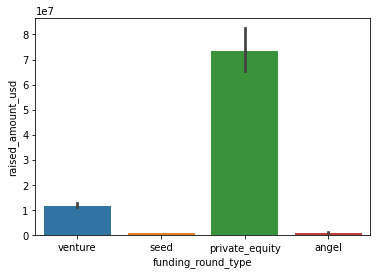

In [28]:
sns.barplot(x="funding_round_type",y="raised_amount_usd",data=merge1)

In [33]:
#Ideal investment type
dict1 = {'Venture': venture_mean, 'Angel': angel_mean, 'Seed': seed_mean, 'Equity': private_equity_mean}
for i in dict1:
    if dict1[i] > 5000000 and dict1[i] < 15000000:
        print(f"Ideal investment type SparkFund is {i}")

Ideal investment type SparkFund is Venture


In [34]:
#Countries with the highest amount of funding for the chosen investment type ie Venture
merge1 = merge1[merge1.funding_round_type=='venture']
merge1.shape

(55493, 16)

In [35]:
# Top 10 countries receiving the most funds
top10 = merge1.groupby("country_code")['raised_amount_usd'].sum().sort_values(ascending=False).reset_index().head(10)
top10

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09
9,SWE,3.254953e+09


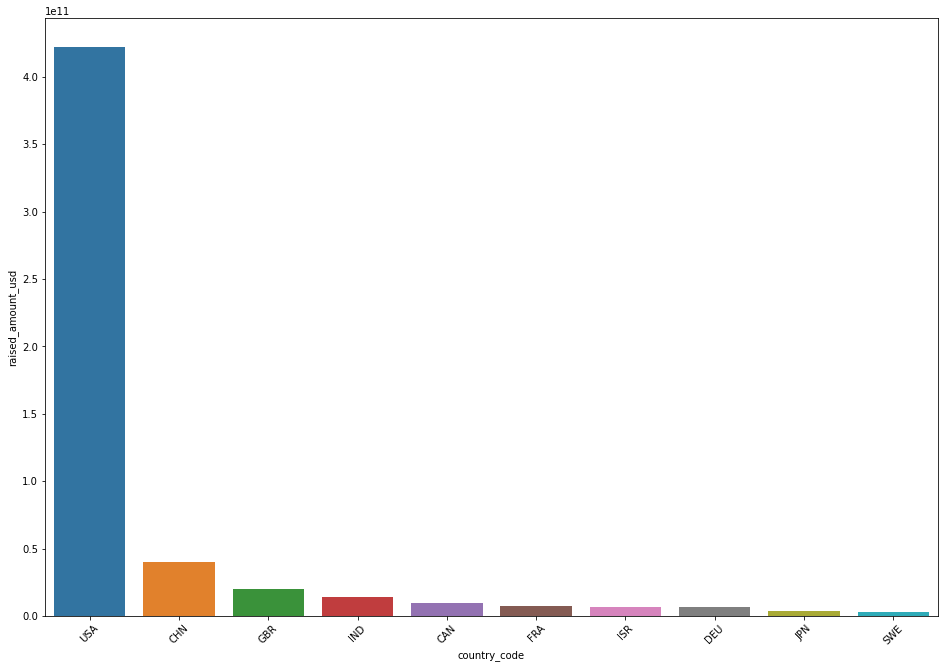

In [38]:
#Plotting it on the graph
plt.figure(figsize=(16,11))
sns.barplot(x="country_code",y="raised_amount_usd",data=top10)
plt.xticks(rotation=45)
plt.show()

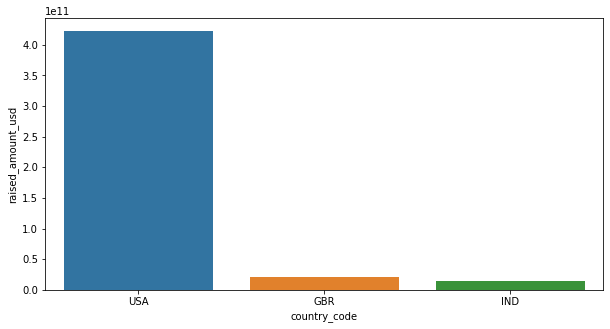

In [40]:
#English speaking countries: USA, GBR, IND
plt.figure(figsize=(10,5))
sns.barplot(x="country_code",y="raised_amount_usd",data=top10[top10.country_code.isin(['USA','GBR','IND'])],estimator=np.sum)
plt.show()

In [41]:
# Sector Analysis
sect_map.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [42]:
sect_map.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [44]:
merge1.dropna(subset=["category_list"],inplace=True)
merge1.reset_index(inplace=True,drop=True)
merge1.shape

(54362, 16)

In [46]:
merge1['primary_sector']=merge1.category_list.apply(lambda x: x.split('|')[0].lower() if '|' in x else x.lower())
sect_map.dropna(inplace=True)
sect_map=sect_map.melt(id_vars="category_list",var_name="main_sector")
sect_map=sect_map[~(sect_map["value"]==0)]
sect_map=sect_map[~(sect_map['main_sector']=='Blanks')]
sect_map['category']=sect_map['category_list'].apply(lambda x: x.lower())
sect_map.drop(['value','category_list'],inplace=True, axis=1)
sect_map.reset_index(inplace=True, drop=True)
sect_map.shape

(687, 2)

In [48]:
set1 = set(merge1['primary_sector'].values)
set2 = set(sect_map['category'].values)
sector_common = set1.intersection(set2)
sector_uncommon = set1.symmetric_difference(set2)
len(sector_common), len(sector_uncommon)

(578, 162)

In [49]:
#Merging the data frames
sector_df = pd.merge(merge1,sect_map,how="inner",left_on='primary_sector',right_on='category')
sector_df.shape

(53352, 19)

<AxesSubplot:xlabel='raised_amount_usd', ylabel='main_sector'>

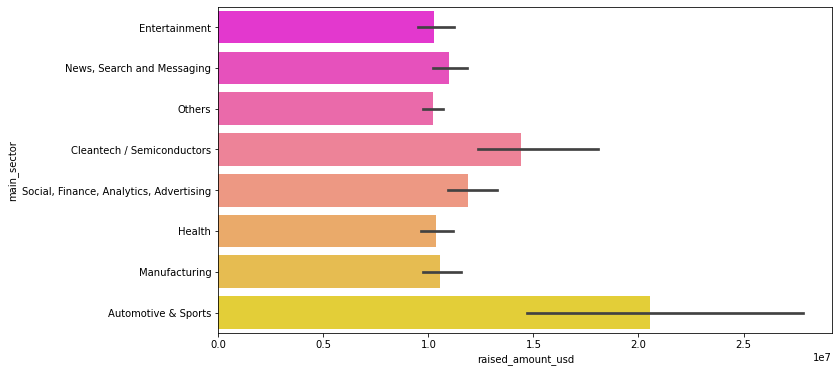

In [52]:
plt.figure(figsize=(11,6))
sns.barplot(x="raised_amount_usd",y="main_sector",data=sector_df,palette='spring')


COUNTRY WISE ANALYSIS


In [59]:
# Country: USA
usa_df = sector_df.loc[(sector_df['country_code']=='USA') & (sector_df['raised_amount_usd']>=5000000) &
                      (sector_df['raised_amount_usd']<15000000)]
print(f"Total number of investments: {usa_df.funding_round_permalink.count()}")
print(f"Total amount of Investment: {usa_df.raised_amount_usd.sum()}")

Total number of investments: 11018
Total amount of Investment: 93480640850.0


In [60]:
# Country: GBR
gbr_df = sector_df.loc[(sector_df['country_code']=='GBR') & (sector_df['raised_amount_usd']>=5000000) &
                      (sector_df['raised_amount_usd']<15000000)]
print(f"Total number of investments: {gbr_df.funding_round_permalink.count()}")
print(f"Total amount of Investment: {gbr_df.raised_amount_usd.sum()}")

Total number of investments: 584
Total amount of Investment: 4952039682.0


In [61]:
# Country: India
india_df = sector_df.loc[(sector_df['country_code']=='IND') & (sector_df['raised_amount_usd']>=5000000) &
                      (sector_df['raised_amount_usd']<15000000)]
print(f"Total number of investments: {india_df.funding_round_permalink.count()}")
print(f"Total amount of Investment: {india_df.raised_amount_usd.sum()}")

Total number of investments: 289
Total amount of Investment: 2387543602.0


In [62]:
# Country: South Korea
sk_df = sector_df.loc[(sector_df['country_code']=='KOR') & (sector_df['raised_amount_usd']>=5000000) &
                      (sector_df['raised_amount_usd']<15000000)]
print(f"Total number of investments: {sk_df.funding_round_permalink.count()}")
print(f"Total amount of Investment: {sk_df.raised_amount_usd.sum()}")

Total number of investments: 18
Total amount of Investment: 152071894.0


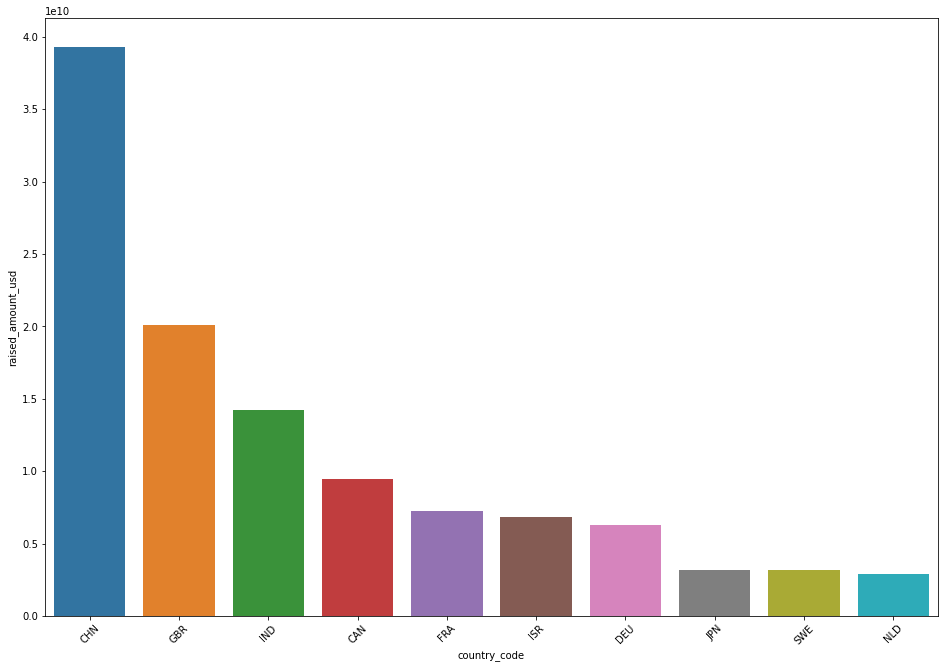

In [63]:
# Top 10 countries excluding USA
merge2 = merge1[merge1.country_code!='USA']
top10 = merge2.groupby("country_code")['raised_amount_usd'].sum().sort_values(ascending=False).reset_index().head(10)
top10
plt.figure(figsize=(16,11))
sns.barplot(x="country_code",y="raised_amount_usd",data=top10)
plt.xticks(rotation=45)
plt.show()